In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df=sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df=df[["age","fare","survived"]]

In [5]:
df

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [6]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [7]:
df["age"].fillna(df["age"].mean(),inplace=True)

C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_17632\613402698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(),inplace=True)
C:\Users\lucius seneca\AppData\Local\Temp\ipykernel_17632\613402698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df["age"].mean(),inplace=True)


In [8]:
df

,age,fare,survived
0,22.000000,7.2500,0
1,38.000000,71.2833,1
2,26.000000,7.9250,1
3,35.000000,53.1000,1
4,35.000000,8.0500,0
...,...,...,...
886,27.000000,13.0000,0
887,19.000000,30.0000,1
888,29.699118,23.4500,0
889,26.000000,30.0000,1


In [9]:
df.describe()

,age,fare,survived
count,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,13.002015,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,29.699118,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


In [10]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [11]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

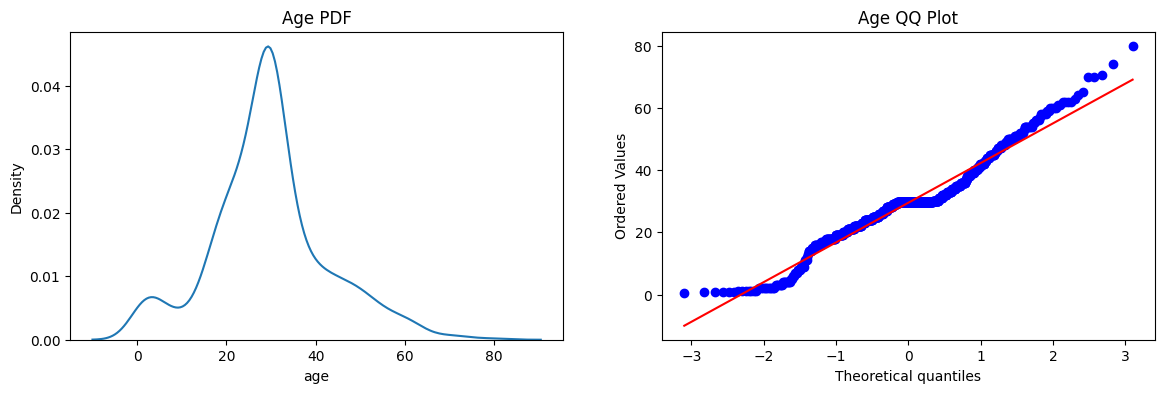

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train["age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["age"],dist="norm",plot=plt)
plt.title("Age QQ Plot")
plt.show()

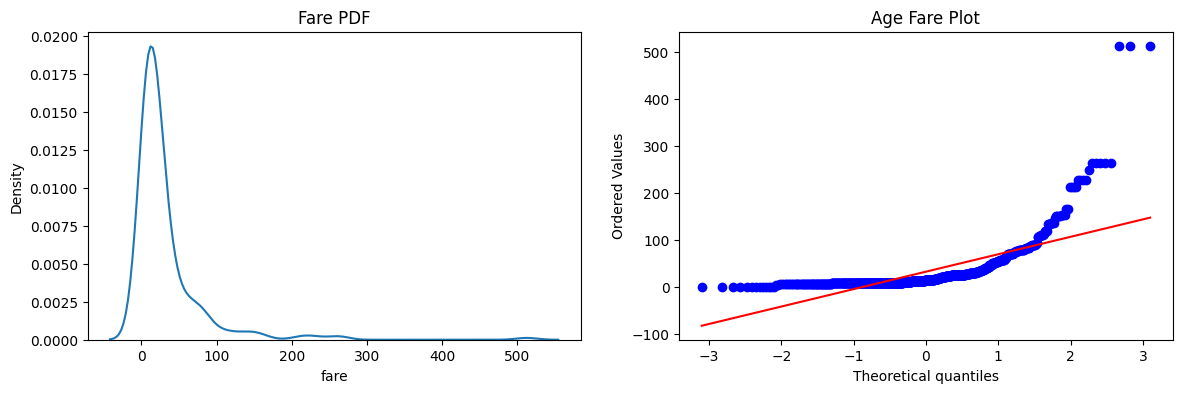

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train["fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["fare"],dist="norm",plot=plt)
plt.title("Age Fare Plot")
plt.show()

In [16]:
clf=LogisticRegression()
clfd=DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)
clfd.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred=clf.predict(X_test)
y_pred1=clfd.predict(X_test)

In [19]:
print("Accuracy Logistic",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic 0.6480446927374302
Accuracy Decision Tree 0.6927374301675978


## Log Tranform

In [20]:
trf=FunctionTransformer(func=np.log1p)
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)


In [21]:
clf=LogisticRegression()
clfd=DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)
clfd.fit(X_train_transformed,y_train)
y_pred=clf.predict(X_test_transformed)
y_pred1=clfd.predict(X_test_transformed)

In [22]:
print("Accuracy Logistic",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic 0.6815642458100558
Accuracy Decision Tree 0.6927374301675978


## Cross validation

In [23]:
X_transformed=trf.fit_transform(X)

In [25]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring="accuracy",cv=10)))
print("DTC",np.mean(cross_val_score(clf2,X_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DTC 0.6565917602996255


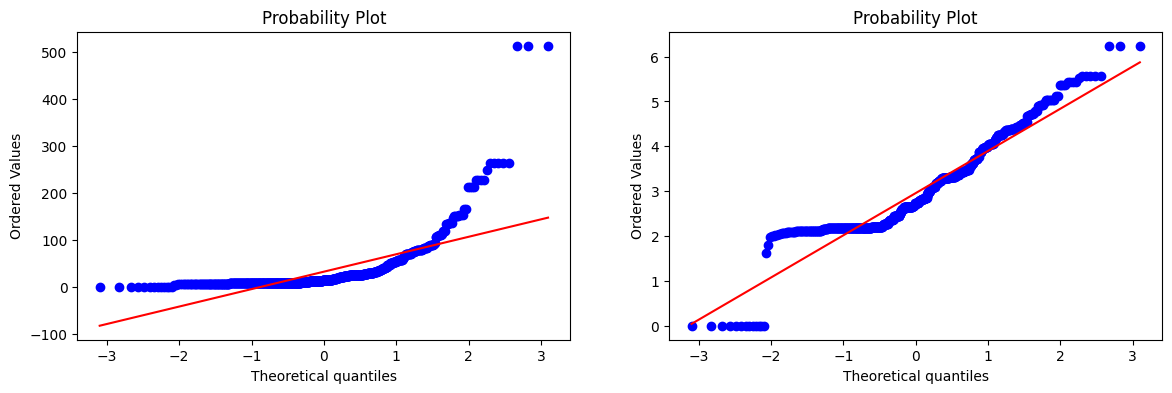

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)


stats.probplot(X_train["fare"],dist="norm",plot=plt)
plt.subplot(122)
stats.probplot(X_train_transformed["fare"],dist="norm",plot=plt)
plt.show()


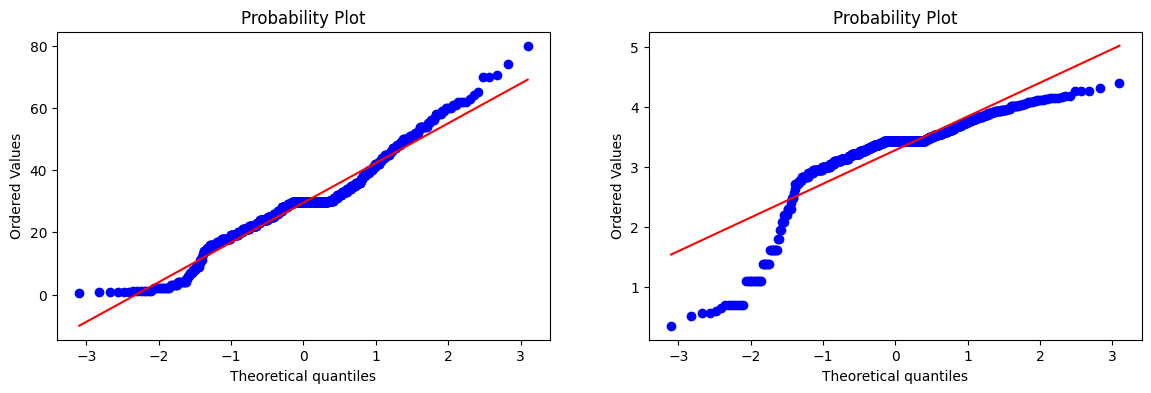

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)


stats.probplot(X_train["age"],dist="norm",plot=plt)
plt.subplot(122)
stats.probplot(X_train_transformed["age"],dist="norm",plot=plt)
plt.show()

## Lets apply log tranform only to Fare columns

In [35]:
trf2=ColumnTransformer([
    ("log",FunctionTransformer(np.log1p),["fare"])
],remainder="passthrough")


In [36]:
X_train_t2=trf2.fit_transform(X_train)


In [37]:
X_test_t2=trf2.transform(X_test)

In [38]:
clf=LogisticRegression()
clfd=DecisionTreeClassifier()
clf.fit(X_train_t2,y_train)
clfd.fit(X_train_t2,y_train)
y_pred=clf.predict(X_test_t2)
y_pred1=clfd.predict(X_test_t2)

In [39]:
print("Accuracy Logistic",accuracy_score(y_test,y_pred))
print("Accuracy Decision Tree",accuracy_score(y_test,y_pred1))

Accuracy Logistic 0.6703910614525139
Accuracy Decision Tree 0.6759776536312849


In [40]:
X_transformed2=trf2.fit_transform(X)

In [41]:
print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring="accuracy",cv=10)))
print("DTC",np.mean(cross_val_score(clfd,X_transformed2,y,scoring="accuracy",cv=10)))

LR 0.6712609238451936
DTC 0.6554681647940075


Custom Transform Apply

In [52]:
def apply_transform(transform):
    X=X=df.iloc[:,0:2]
    y=df.iloc[:,-1]
    trf=ColumnTransformer([
        ("custom",FunctionTransformer(transform),["fare"])
    ],remainder="passthrough")
    X_trans=trf.fit_transform(X)
    clf=LogisticRegression()
    print("Accuracy_score",np.mean(cross_val_score(clf,X_trans,y,scoring="accuracy",cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X["fare"],dist="norm",plot=plt)
    plt.title("fare Before transform")
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare after transform")
    plt.show()

Accuracy_score 0.6566541822721599


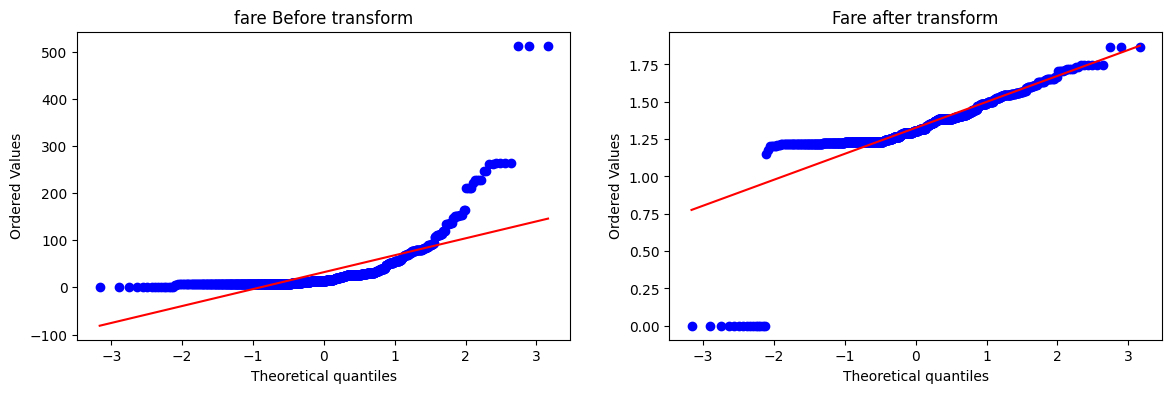

In [57]:
apply_transform(lambda x:x**0.1)